## 主成分分析法
降维是区别于聚类的另一种无监督学习算法，`主成分分析`(`principal component analysis, PCA`)是一种经典的降维算法。PCA是一种应用广泛的数据分析和降维方法。

PCA通过正交变换将一组由线性相关变量表示的数据转换为几个由线性无关变量表示的数据，这几个线性无关变量就是主成分。

针对高维数据的降维问题，PCA的基本思路如下：首先将需要降维的数据的各个变量标准化（规范化）为均值为0、方差为1的数据集，然后对标准化后的数据进行正交变换，将原来的数据转换为由若干个线性无关向量表示的新数据。**这些新向量表示的数据不仅要求相互线性无关，而且需要所包含的信息量最大。**

作为一种多元统计分析方法，PCA在数据压缩和数据去噪等领域都有广泛应用。

### 1 PCA原理推导

### 2 PCA算法实现
#### 2.1 基于numpy实现pca算法
按照上述算法流程中的(1)-(5)步骤实现即可：

In [6]:
import numpy as np

# PCA算法类
class PCA:
    def calc_cov(self, X): # 定义协方差矩阵计算方法
        n = X.shape[0] # 样本量
        X = (X - np.mean(X, axis=0)) # 这里没有进行标准化操作，做了中心化操作
        return 1 / n * np.matmul(X.T, X)
    
    def pca(self, X, n_components): # PCA算法实现：输入要进行PCA的矩阵和指定的主成分个数
        cov_matrix = self.calc_cov(X) # 计算协方差矩阵
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # np.linalg.eig计算方阵的特征值和右特征向量
        idx = eigenvalues.argsort()[::-1] # [::1] 表示取整个数组，但按逆序排列
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components] # 取最大的前n_component组
        return np.matmul(X, eigenvectors) # Y=PX转换

数据测试

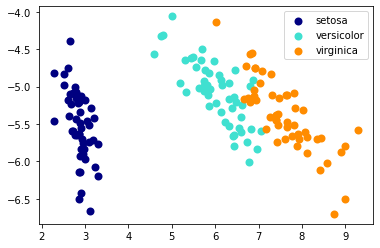

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_trans = PCA().pca(X, 2) # 将数据降维到2个主成分

colors = ['navy', 'turquoise', 'darkorange'] # 颜色列表
for c, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], color=c, lw=2, label=target_name)
plt.legend()
plt.show()

### 2.2 基于sklearn的pca算法实现
sklearn中的pca基于奇异值分解算法实现

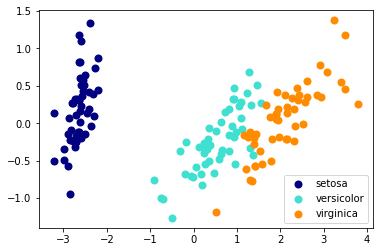

In [9]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_trans = pca.transform(X) # 拟合模型并将模型用于数据X

colors = ['navy', 'turquoise', 'darkorange'] # 颜色列表
for c, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], color=c, lw=2, label=target_name)
plt.legend()
plt.show()